**Business Understanding**
Sebuah toko online dengan produk kebutuhan rumah yang terdapat beberapa barang, dari data tersebut kami ingin menganalisis data produk untuk memahami performa produk.

Konteks Bisnis: Proyek ini berlatar belakang toko online yang menyediakan berbagai produk kebutuhan rumah. Toko ini memiliki data transaksi atau data produk yang mencakup informasi seperti nama produk, kategori, harga jual, dan harga pasar.

Tujuan: Tujuan utama analisis ini adalah untuk mendapatkan pemahaman yang mendalam tentang performa produk. "Performa produk" ini bisa memiliki beberapa makna, tergantung pada fokus bisnis toko. Berdasarkan kolom data yang tersedia (terutama sale_price dan market_price), tujuan spesifik yang mungkin meliputi:

Analisis Harga: Memahami hubungan antara harga jual (sale_price) dan harga pasar (market_price), mengidentifikasi produk yang dijual di atas atau di bawah harga pasar, dan menganalisis margin keuntungan potensial.
Identifikasi Produk Berkinerja Tinggi/Rendah: Menemukan produk atau kategori produk mana yang memiliki harga jual rata-rata tertinggi, yang mungkin mengindikasikan popularitas atau nilai premium.
Strategi Penentuan Harga: Menggunakan analisis untuk menginformasikan strategi penentuan harga di masa depan, misalnya dengan memprediksi harga jual optimal berdasarkan harga pasar atau mengelompokkan produk berdasarkan pola harga.
Manajemen Inventaris: Pemahaman tentang kategori produk yang paling banyak atau paling sedikit mungkin membantu dalam manajemen inventaris.
Pengembangan Produk: Mengidentifikasi kategori atau sub-kategori yang populer dapat memberikan wawasan untuk pengembangan produk baru.
Data yang Tersedia: Analisis akan menggunakan data produk dengan kolom-kolom seperti:

product: Nama produk.
category: Kategori utama produk (misal: Furnitur, Elektronik Rumah Tangga).
sub_category: Sub-kategori produk (misal: Sofa, Kulkas).
brand: Merek produk.
sale_price: Harga jual aktual di toko online.
market_price: Estimasi harga produk di pasar umum.
type: Varian spesifik produk.
rating: Umpan balik konsumen (meskipun tampaknya kolom ini dihapus dalam analisis Anda).
Pendekatan Analisis: Berdasarkan kode yang Anda berikan, pendekatan yang diambil meliputi:

Exploratory Data Analysis (EDA): Memahami struktur data, ringkasan statistik, penanganan nilai hilang, dan outlier.
Analisis Harga: Membandingkan sale_price dan market_price, menghitung potensi keuntungan atau margin.
Analisis Kategori/Sub-kategori: Menghitung jumlah produk per kategori, rata-rata harga jual per kategori.
K-Means Clustering: Mengelompokkan produk berdasarkan fitur numerik (sale_price, market_price) untuk mengidentifikasi segmen produk dengan karakteristik harga serupa.
Regresi Linear: Membangun model untuk memprediksi sale_price berdasarkan market_price.
Decision Tree: Membangun model pohon keputusan untuk memprediksi sale_price berdasarkan market_price, kemungkinan dengan tujuan menetapkan harga jual yang lebih tinggi dari harga pasar

| Nama Kolom (Column Name) | Deskripsi (Description)                                                                 |
|--------------------------|-----------------------------------------------------------------------------------------|
| index                    | Nomor urut unik yang mengidentifikasi setiap entri produk.                               |
| product                  | Nama atau judul yang digunakan untuk menampilkan produk.                                  |
| category                 | Klasifikasi utama di mana produk tersebut terdaftar.                                      |
| sub_category             | Pengelompokan lebih spesifik di dalam kategori utama produk.                             |
| brand                    | Nama produsen atau merek dagang yang terkait dengan produk.                               |
| sales_price              | Nilai moneter aktual produk saat ditawarkan untuk dijual pada platform.                   |
| market_price             | Estimasi nilai produk di pasaran umum.                                                   |
| type                     | Varian atau klasifikasi spesifik dari produk.                                            |
| rating                   | Skor evaluasi atau umpan balik kuantitatif dari konsumen mengenai kualitas produk.          |

# Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

In [ ]:
df = pd.read_csv('retail.csv')

In [ ]:
df.head()

,index,product,category,sub_category,brand,sale_price,market_price,type,rating,description
0,1,Garlic Oil - Vegetarian Capsule 500 mg,Beauty & Hygiene,Hair Care,Sri Sri Ayurveda,220.0,220.0,Hair Oil & Serum,4.1,This Product contains Garlic Oil that is known...
1,2,Water Bottle - Orange,"Kitchen, Garden & Pets",Storage & Accessories,Mastercook,180.0,180.0,Water & Fridge Bottles,2.3,"Each product is microwave safe (without lid), ..."
2,3,"Brass Angle Deep - Plain, No.2",Cleaning & Household,Pooja Needs,Trm,119.0,250.0,Lamp & Lamp Oil,3.4,"A perfect gift for all occasions, be it your m..."
3,4,Cereal Flip Lid Container/Storage Jar - Assort...,Cleaning & Household,Bins & Bathroom Ware,Nakoda,149.0,176.0,"Laundry, Storage Baskets",3.7,Multipurpose container with an attractive desi...
4,5,Creme Soft Soap - For Hands & Body,Beauty & Hygiene,Bath & Hand Wash,Nivea,162.0,162.0,Bathing Bars & Soaps,4.4,Nivea Creme Soft Soap gives your skin the best...


### Statistical Summary

In [ ]:
categoricals =  ['product', 'category', 'sub_category', 'brand', 'type','description']
numericals = ['sale_price', 'market_price']

In [ ]:
df[numericals].describe()

,sale_price,market_price
count,27555.000000,27555.000000
mean,322.514808,382.056664
std,486.263116,581.730717
min,2.450000,3.000000
25%,95.000000,100.000000
50%,190.000000,220.000000
75%,359.000000,425.000000
max,12500.000000,12500.000000


Ringkasan Statistik Variabel Numerik

###Rata-rata:

* sale_price: Nilai rata-rata harga jual adalah sekitar 322.51.
* market_price: Harga pasar rata-rata tercatat sekitar 382.05.
* Terlihat bahwa harga pasar secara umum lebih tinggi jika dibandingkan dengan harga jual.

###Kuartil (Distribusi Data):

* Kuartil Pertama (Q1 - 25%): Seperempat dari seluruh produk memiliki harga jual di bawah 95.0 dan harga pasar di bawah 100.0.
* Median (Kuartil Kedua - 50%): Titik tengah data menunjukkan bahwa harga jual median adalah 190.0, sedangkan harga pasar median adalah 220.0.
* kuartil Ketiga (Q3 - 75%): Tiga perempat dari data memiliki harga jual kurang dari 359.0 dan harga pasar kurang dari 425.0.

In [ ]:
df[categoricals].describe()

,product,category,sub_category,brand,type,description
count,27554,27555,27555,27554,27555,27440
unique,23540,11,90,2313,426,21944
top,Turmeric Powder/Arisina Pudi,Beauty & Hygiene,Skin Care,Fresho,Face Care,A brand inspired by the Greek goddess of victo...
freq,26,7867,2294,638,1508,47


In [ ]:
len(df.drop_duplicates()) / len(df)


1.0

In [ ]:
duplicates = df[df.duplicated(keep=False)]

print("Baris dengan duplikat:")
duplicates

Baris dengan duplikat:


,index,product,category,sub_category,brand,sale_price,market_price,type,rating,description


### Missing Value

In [ ]:
df.isna().sum()

,0
index,0
product,1
category,0
sub_category,0
brand,1
sale_price,0
market_price,0
type,0
rating,8626
description,115


In [ ]:
total_rows = len(df)
for column in df.columns:
    missing_count = df[column].isna().sum()
    missing_percentage = (missing_count / total_rows) * 100
    print(f"Column '{column}' Has {missing_count} missing values ({missing_percentage:.2f}%)")

Column 'index' Has 0 missing values (0.00%)
Column 'product' Has 1 missing values (0.00%)
Column 'category' Has 0 missing values (0.00%)
Column 'sub_category' Has 0 missing values (0.00%)
Column 'brand' Has 1 missing values (0.00%)
Column 'sale_price' Has 0 missing values (0.00%)
Column 'market_price' Has 0 missing values (0.00%)
Column 'type' Has 0 missing values (0.00%)
Column 'rating' Has 8626 missing values (31.30%)
Column 'description' Has 115 missing values (0.42%)


In [ ]:
df['product'].fillna(df['product'].mode()[0], inplace=True)
df['brand'].fillna(df['brand'].mode()[0], inplace=True)
df['description'].fillna(df['description'].mode()[0], inplace=True)

<ipython-input-64-912dc79b451c>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['product'].fillna(df['product'].mode()[0], inplace=True)
<ipython-input-64-912dc79b451c>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)

In [ ]:
df = df.drop(columns=['rating'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27555 entries, 0 to 27554
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   index         27555 non-null  int64  
 1   product       27555 non-null  object 
 2   category      27555 non-null  object 
 3   sub_category  27555 non-null  object 
 4   brand         27555 non-null  object 
 5   sale_price    27555 non-null  float64
 6   market_price  27555 non-null  float64
 7   type          27555 non-null  object 
 8   description   27555 non-null  object 
dtypes: float64(2), int64(1), object(6)
memory usage: 1.9+ MB


### Outlier Handling

In [ ]:
def check_plot(df, variable):
    # fungsi mengambil kerangka data (df) dan
    # variabel yang diminati sebagai argumen

    # tentukan ukuran gambar
    plt.figure(figsize=(16, 4))

    # histogram
    plt.subplot(1, 3, 1)
    # Ubah warna histogram menjadi biru tosca (teal)
    sns.histplot(df[variable], bins=30, color='pink')
    plt.title('Histogram')

    # plot Q-Q
    plt.subplot(1, 3, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    # Q-Q plot tidak memiliki parameter color yang sama seperti histplot atau boxplot,
    # jadi warnanya akan tetap default.
    plt.ylabel('Variable quantiles')

    # box plot
    plt.subplot(1, 3, 3)
    # Ubah warna boxplot menjadi biru tosca (teal)
    sns.boxplot(y=df[variable], color='pink')
    plt.title('Boxplot')

    plt.show()


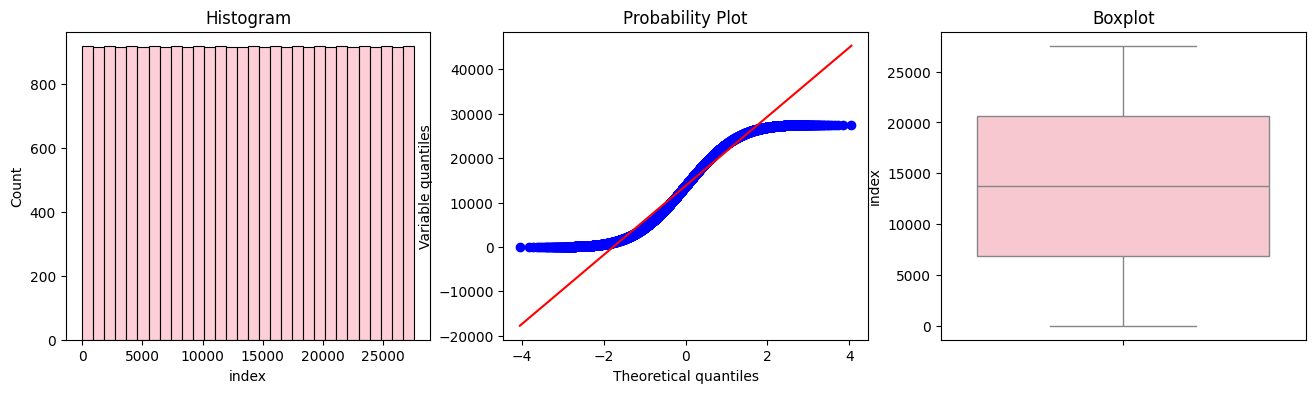

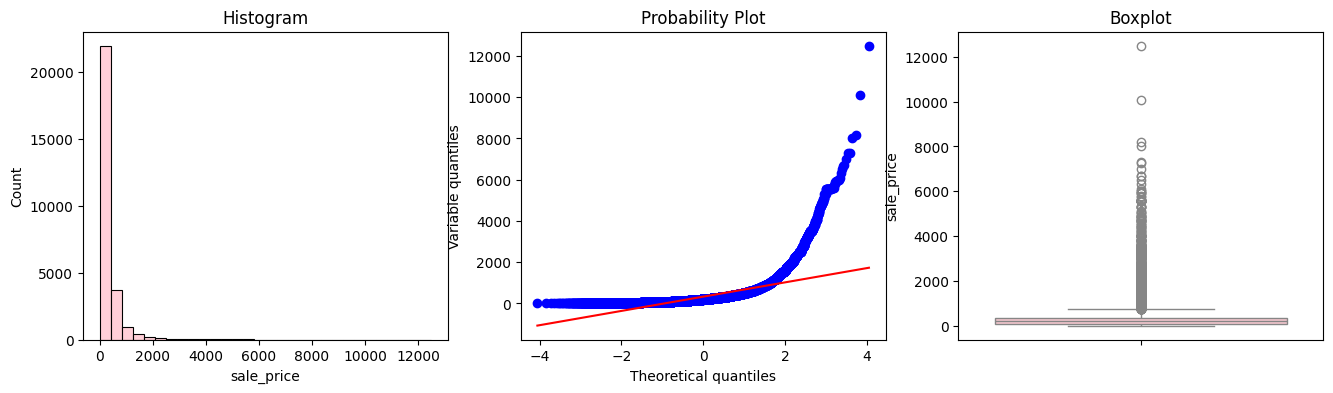

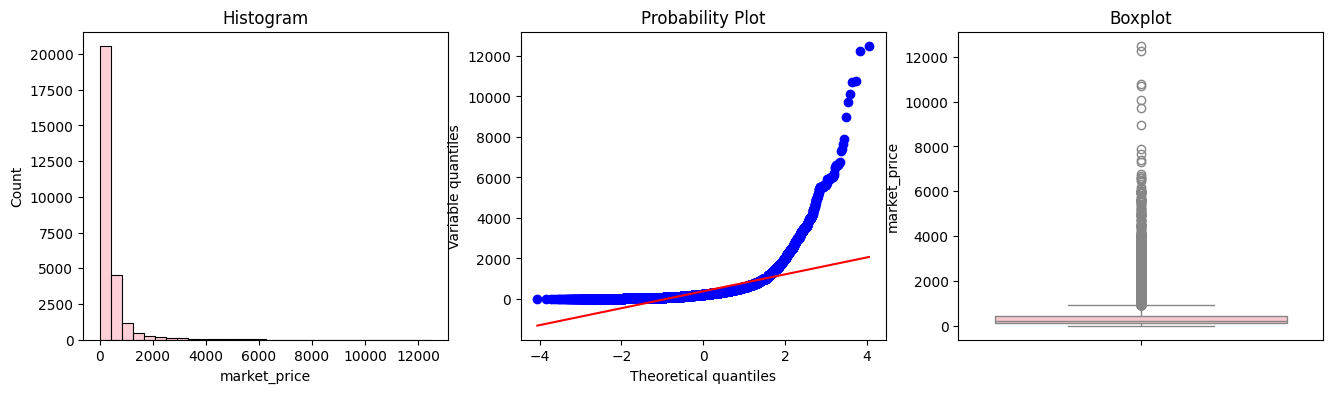

In [ ]:
numeric_columns = df.select_dtypes(include=['number']).columns
for col in numeric_columns:
    check_plot(df, col)

In [ ]:
def find_outlier_boundary(df, variable):


    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)

    lower_boundary = df[variable].quantile(0.25) - (IQR * 1.5)
    upper_boundary = df[variable].quantile(0.75) + (IQR * 1.5)

    return upper_boundary, lower_boundary

In [ ]:
full_occup_upper_limit, full_occup_lower_limit = find_outlier_boundary(df,'sale_price')
full_occup_upper_limit, full_occup_lower_limit

(np.float64(755.0), np.float64(-301.0))

In [ ]:
full_occup_upper_limit, full_occup_lower_limit = find_outlier_boundary(df,'market_price')
full_occup_upper_limit, full_occup_lower_limit

(np.float64(912.5), np.float64(-387.5))

In [ ]:
data_clf = df[(df['market_price'] <= full_occup_upper_limit) & (df['market_price'] >= full_occup_lower_limit)]

In [ ]:
data_clf = df[(df['market_price'] <= full_occup_upper_limit) & (df['sale_price'] >= full_occup_lower_limit)]

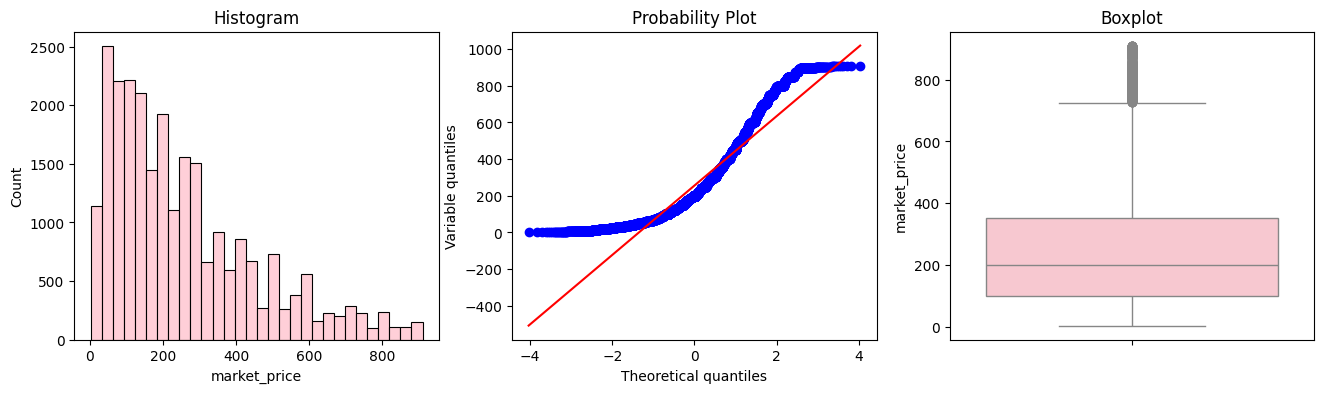

In [ ]:
check_plot(data_clf, 'market_price')

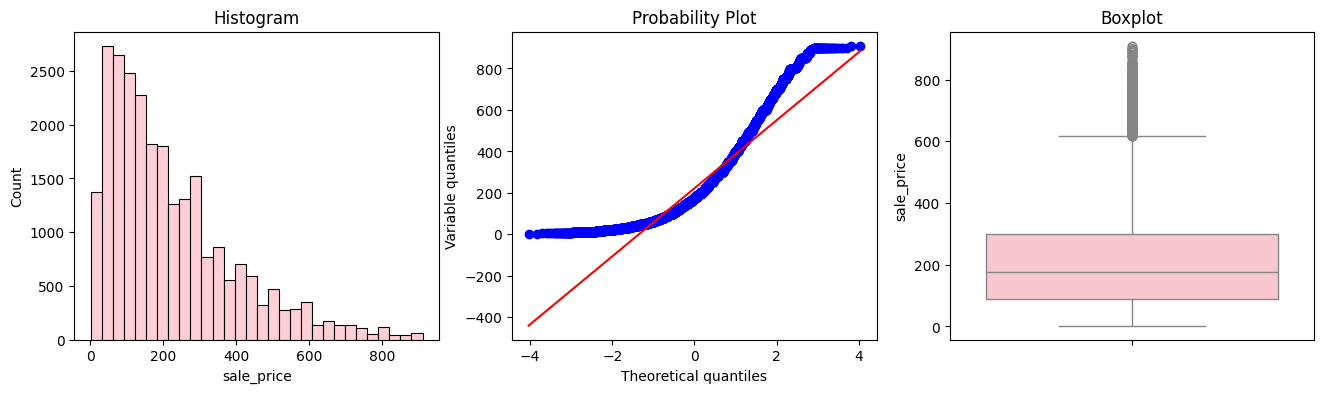

In [ ]:
check_plot(data_clf, 'sale_price')

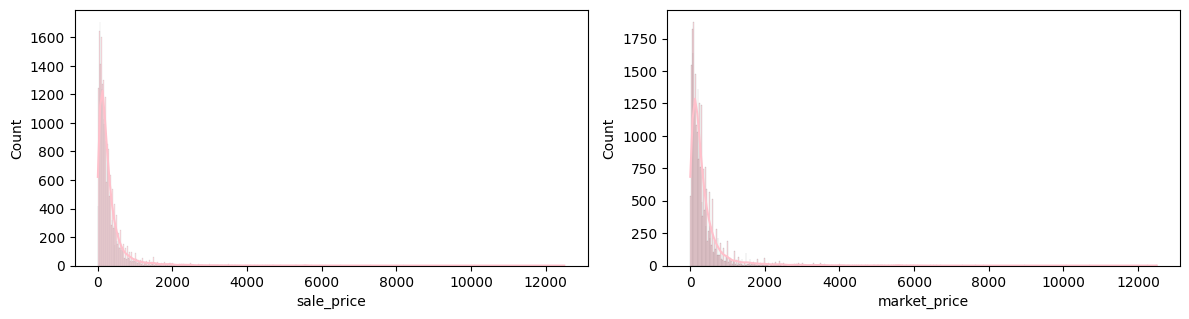

In [ ]:
# adjust the figure size for better readability
plt.figure(figsize=(12,6))

features = numericals
for i in range(0, len(features)):
    plt.subplot(2, len(features)//2 + 1, i+1)
    sns.histplot(x=df[features[i]], color='pink', kde=True)
    plt.xlabel(features[i])
    plt.tight_layout()

<ipython-input-77-367e27839407>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='category', y='sale_price', data=df, palette='viridis')
<ipython-input-77-367e27839407>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='category', y='market_price', data=df, palette='viridis')


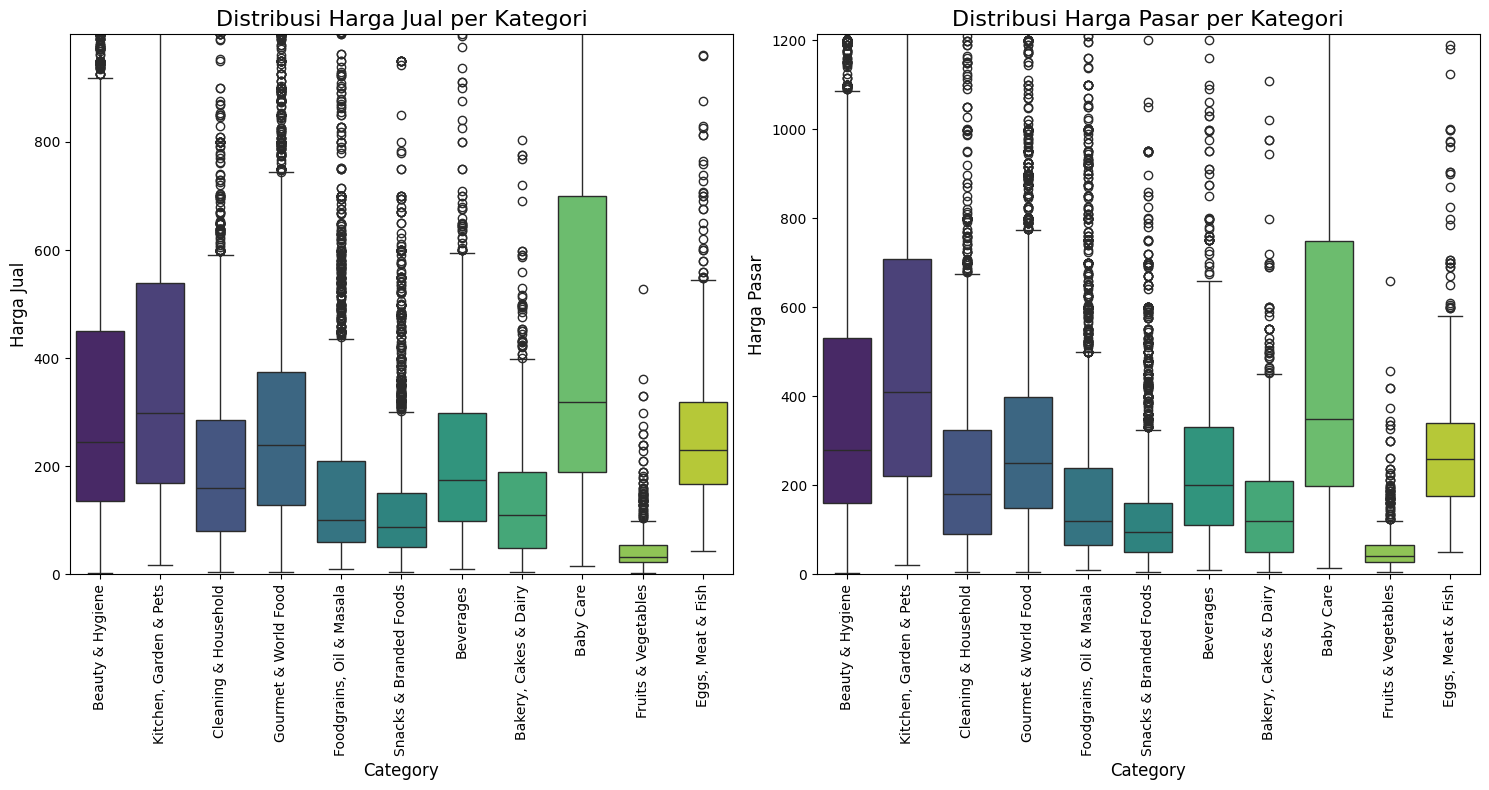

In [ ]:
# Visualisasi Distribusi Harga Jual dan Harga Pasar berdasarkan Kategori
plt.figure(figsize=(15, 8))

# Box plot untuk Sale Price
plt.subplot(1, 2, 1) # 1 baris, 2 kolom, plot ke-1
sns.boxplot(x='category', y='sale_price', data=df, palette='viridis')
plt.title('Distribusi Harga Jual per Kategori', fontsize=16)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Harga Jual', fontsize=12)
plt.xticks(rotation=90)
plt.ylim(0, df['sale_price'].quantile(0.95)) # Batasi sumbu y untuk outlier

# Box plot untuk Market Price
plt.subplot(1, 2, 2) # 1 baris, 2 kolom, plot ke-2
sns.boxplot(x='category', y='market_price', data=df, palette='viridis')
plt.title('Distribusi Harga Pasar per Kategori', fontsize=16)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Harga Pasar', fontsize=12)
plt.xticks(rotation=90)
plt.ylim(0, df['market_price'].quantile(0.95)) # Batasi sumbu y untuk outlier

plt.tight_layout()
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27555 entries, 0 to 27554
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   index         27555 non-null  int64  
 1   product       27555 non-null  object 
 2   category      27555 non-null  object 
 3   sub_category  27555 non-null  object 
 4   brand         27555 non-null  object 
 5   sale_price    27555 non-null  float64
 6   market_price  27555 non-null  float64
 7   type          27555 non-null  object 
 8   description   27555 non-null  object 
dtypes: float64(2), int64(1), object(6)
memory usage: 1.9+ MB


### EDA Question
1. Apa saja produk yang memiliki harga market diatas rata-rata

Apa saja produk yang memiliki harga market diatas rata-rata (Filtering)

In [ ]:
df_filtered = df[df['market_price'] > df['market_price'].mean()]
df_filtered

,index,product,category,sub_category,brand,sale_price,market_price,type,description
8,9,Biotin & Collagen Volumizing Hair Shampoo + Bi...,Beauty & Hygiene,Hair Care,StBotanica,1098.00,1098.0,Shampoo & Conditioner,"An exclusive blend with Vitamin B7 Biotin, Hyd..."
11,12,Butter Cookies Gold Collection,Gourmet & World Food,Chocolates & Biscuits,Sapphire,600.00,600.0,"Luxury Chocolates, Gifts",Enjoy a tin full of delicious butter cookies m...
20,21,Ceramic Barrel Brush - Colour May Vary,Beauty & Hygiene,Hair Care,Bronson Professional,525.00,700.0,Tools & Accessories,This Ceramic Barrel Brush by Bronson Professio...
25,26,Insulated Hot Fresh Casserole For Roti/Chapati...,"Kitchen, Garden & Pets",Flask & Casserole,Cello,659.00,895.0,Casserole,Stop your worries about keeping your food warm...
34,35,Pet Solitaire Container Set - Silver,"Kitchen, Garden & Pets",Storage & Accessories,Steelo,499.00,969.0,Containers Sets,"The Steelo plastic PET Container Set, is made ..."
...,...,...,...,...,...,...,...,...,...
27542,27543,Embellish Skin Lightening Serum,Beauty & Hygiene,Skin Care,Organic Harvest,1525.75,1795.0,Face Care,Achieve an everlasting illuminated skin by inc...
27544,27545,"Brass Dhoop Aarti With Wooden Handle,No.3",Cleaning & Household,Pooja Needs,Trm,239.00,495.0,Other Pooja Needs,Dhoobakal is a vessel used for burning the Dho...
27548,27549,Apple Cider Vinegar Shampoo,Beauty & Hygiene,Hair Care,Morpheme Remedies,499.00,499.0,Shampoo & Conditioner,"Say no to dull, lifeless, dry and damaged hair..."
27553,27554,Green Tea - Pure Original,Beverages,Tea,Tetley,396.00,495.0,Tea Bags,"Tetley Green Tea with its refreshing pure, ori..."


2. Berapa banyak jumlah produk di setiap category?

In [ ]:
product_counts = df['category'].value_counts().sort_values(ascending=False)
product_counts

,count
category,
Beauty & Hygiene,7867
Gourmet & World Food,4690
"Kitchen, Garden & Pets",3580
Snacks & Branded Foods,2814
"Foodgrains, Oil & Masala",2676
Cleaning & Household,2675
Beverages,885
"Bakery, Cakes & Dairy",851
Baby Care,610


<ipython-input-81-01d6d23cb0cd>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Category', y='Jumlah Produk', data=product_counts_by_category, palette='viridis')


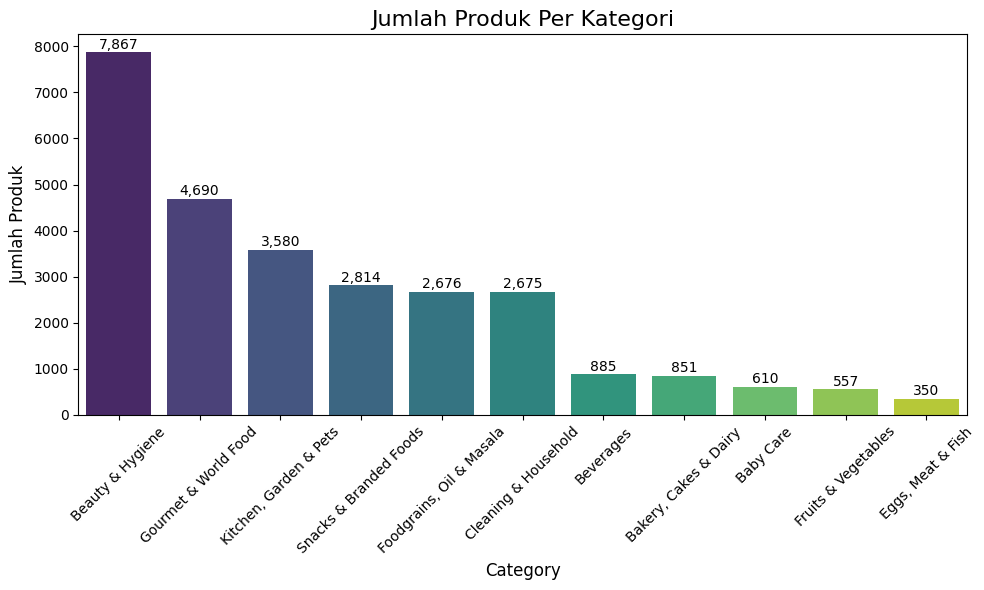

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Hitung jumlah produk per kategori
product_counts_by_category = df['category'].value_counts().reset_index()
product_counts_by_category.columns = ['Category', 'Jumlah Produk']
plt.figure(figsize=(10, 6))
sns.barplot(x='Category', y='Jumlah Produk', data=product_counts_by_category, palette='viridis')
for i, count in enumerate(product_counts_by_category['Jumlah Produk']):
    plt.text(i, count + (0.01 * product_counts_by_category['Jumlah Produk'].max()), f"{count:,.0f}",
             ha='center', fontsize=10, color='black')
plt.title('Jumlah Produk Per Kategori', fontsize=16)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Jumlah Produk', fontsize=12)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


3. Produk apa yang memiliki harga penjualan (sale_price) rata-rata tertinggi di setiap kategori (category)?

In [ ]:
avg_sale_price_by_category = df.groupby('category')['sale_price'].mean().sort_values(ascending=False)
avg_sale_price_by_category

,sale_price
category,
Baby Care,534.946180
"Kitchen, Garden & Pets",507.524615
Beauty & Hygiene,418.679197
Gourmet & World Food,319.854011
"Eggs, Meat & Fish",288.897486
Beverages,239.758949
Cleaning & Household,226.173118
"Foodgrains, Oil & Masala",193.167500
"Bakery, Cakes & Dairy",142.802750


### Implementasi K-Means Clustering

**K-Means Clustering** hanya dapat bekerja dengan **data numerik**. Sebelum kita mulai, mari kita pahami masalah yang akan kita hadapi.

Kita memiliki dataset **BigBasket_products** yang berisi data penjualan produk. Dalam dataset ini, kita memiliki beberapa kolom seperti:

* **index:** Nomor urut data
* **product_category:** Kategori produk
* **sub_category:** Subkategori produk
* **brand:** Merek produk
* **sale_price:** Harga jual
* **market_price:** Harga pasaran
* **type:** Jenis produk
* **description:** Jumlah total uang yang telah dihabiskan pelanggan untuk produk tersebut

**Tujuan kita:** menentukan harga jual unutk setiap kategori barang agar mendapat keuntungan

- Menghitung keuntungan per produk:

\text{Profit Per Item} = \text{sale_price} - \text{market_price}
Menganalisis strategi harga:

Kalau sale_price < market_price, artinya kamu menjual lebih murah dari harga pasar (diskon/promo).
Kalau sale_price > market_price, berarti kamu menjual lebih mahal dari harga pasar (premium pricing).
Mengukur performa kategori/subkategori:
Menggunakan profit untuk menentukan mana kategori/subkategori yang paling menguntungkan.



In [ ]:
df.info(), df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27555 entries, 0 to 27554
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   index         27555 non-null  int64  
 1   product       27555 non-null  object 
 2   category      27555 non-null  object 
 3   sub_category  27555 non-null  object 
 4   brand         27555 non-null  object 
 5   sale_price    27555 non-null  float64
 6   market_price  27555 non-null  float64
 7   type          27555 non-null  object 
 8   description   27555 non-null  object 
dtypes: float64(2), int64(1), object(6)
memory usage: 1.9+ MB


(None,
    index                                            product  \
 0      1             Garlic Oil - Vegetarian Capsule 500 mg   
 1      2                              Water Bottle - Orange   
 2      3                     Brass Angle Deep - Plain, No.2   
 3      4  Cereal Flip Lid Container/Storage Jar - Assort...   
 4      5                 Creme Soft Soap - For Hands & Body   
 
                  category           sub_category              brand  \
 0        Beauty & Hygiene              Hair Care  Sri Sri Ayurveda    
 1  Kitchen, Garden & Pets  Storage & Accessories         Mastercook   
 2    Cleaning & Household            Pooja Needs                Trm   
 3    Cleaning & Household   Bins & Bathroom Ware             Nakoda   
 4        Beauty & Hygiene       Bath & Hand Wash              Nivea   
 
    sale_price  market_price                      type  \
 0       220.0         220.0          Hair Oil & Serum   
 1       180.0         180.0    Water & Fridge Bottles   

In [ ]:
df.describe()

,index,sale_price,market_price
count,27555.00000,27555.000000,27555.000000
mean,13778.00000,322.514808,382.056664
std,7954.58767,486.263116,581.730717
min,1.00000,2.450000,3.000000
25%,6889.50000,95.000000,100.000000
50%,13778.00000,190.000000,220.000000
75%,20666.50000,359.000000,425.000000
max,27555.00000,12500.000000,12500.000000


### Data Preparation

### Seperti yang telah disebutkan sebelumnya bahwa, tujuan analisis yang dilakukan pada case ini adalah untuk memperoleh keuntungan harga dari kolom sale_price dan market_price

Menghitung keuntungan: (\text{sale_price} - \text{market_price}) untuk setiap produk.

In [ ]:
df['profit'] = df['sale_price'] - df['market_price']

Performansi Kategori Penjualan

Mengelompokkan data berdasarkan category untuk melihat total keuntungan dan jumlah produk.

In [ ]:
category_summary = df.groupby('category').agg(
    total_profit=('profit', 'sum'),
    total_products=('product', 'count')
).reset_index()
print(category_summary)


                    category  total_profit  total_products
0                  Baby Care     -37702.83             610
1      Bakery, Cakes & Dairy     -12831.86             851
2           Beauty & Hygiene    -588892.98            7867
3                  Beverages     -28740.33             885
4       Cleaning & Household     -96137.26            2675
5          Eggs, Meat & Fish     -12928.30             350
6   Foodgrains, Oil & Masala     -98916.77            2676
7        Fruits & Vegetables      -7544.19             557
8       Gourmet & World Food    -180878.64            4690
9     Kitchen, Garden & Pets    -544636.28            3580
10    Snacks & Branded Foods     -31466.42            2814


In [ ]:
subcategory_summary = df.groupby('sub_category').agg(
    total_profit=('profit', 'sum'),
    total_products=('product', 'count')
).reset_index()
print(subcategory_summary)


                sub_category  total_profit  total_products
0       All Purpose Cleaners     -10438.46             475
1   Appliances & Electricals     -22344.55             138
2       Atta, Flours & Sooji      -4961.36             152
3           Baby Accessories          0.00              37
4        Baby Bath & Hygiene      -2958.73             206
..                       ...           ...             ...
85            Steel Utensils     -96509.00             353
86     Storage & Accessories    -130170.00            1015
87                       Tea     -19367.48             334
88   Tinned & Processed Food      -2342.15             168
89                     Water        -45.75              17

[90 rows x 3 columns]


### Model Building

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import pickle

In [ ]:
features_for_clustering = ['sale_price', 'market_price']
X = df[features_for_clustering]

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
inertias = []
silhouette_scores = []
k_range = range(2, 11)

In [ ]:
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)
    score = silhouette_score(X_scaled, kmeans.labels_)
    silhouette_scores.append(score)

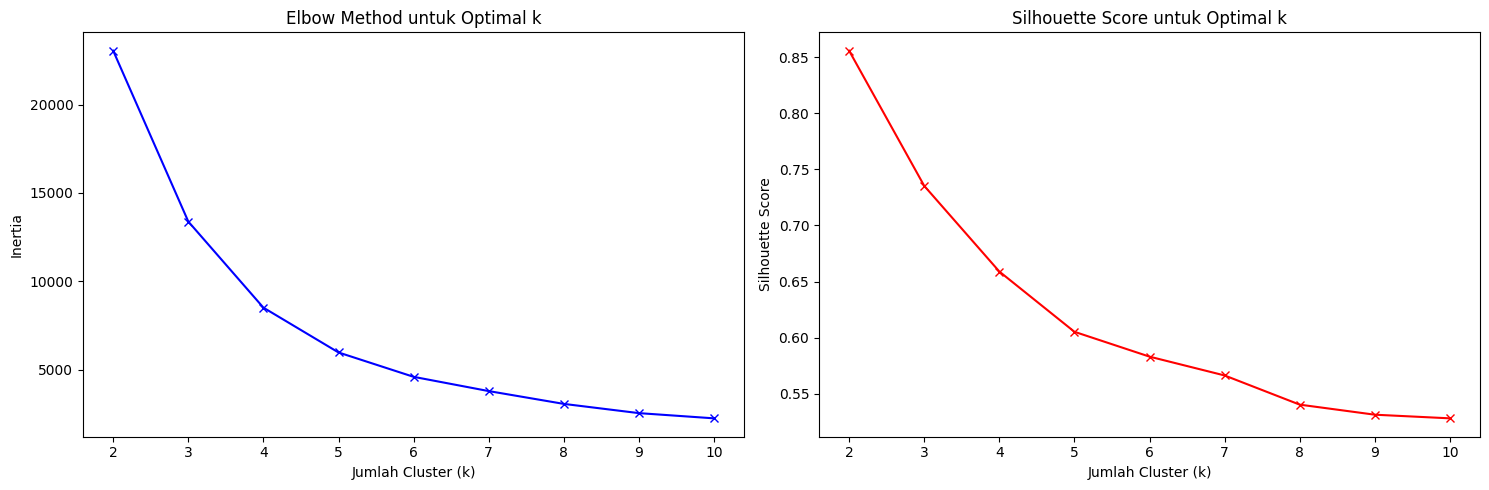


Nilai Silhouette Score untuk setiap k:
k=2: 0.8558
k=3: 0.7353
k=4: 0.6589
k=5: 0.6052
k=6: 0.5830
k=7: 0.5662
k=8: 0.5402
k=9: 0.5313
k=10: 0.5280


In [ ]:
# Visualisasi elbow method dan silhouette score
plt.figure(figsize=(15, 5))

# Plot Elbow Method
plt.subplot(1, 2, 1)
plt.plot(k_range, inertias, 'bx-')
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method untuk Optimal k')

# Plot Silhouette Score
plt.subplot(1, 2, 2)
plt.plot(k_range, silhouette_scores, 'rx-')
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score untuk Optimal k')
plt.tight_layout()
plt.show()

print("\nNilai Silhouette Score untuk setiap k:")
for k, score in zip(k_range, silhouette_scores):
    print(f"k={k}: {score:.4f}")

In [ ]:
optimal_k = 3
final_kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['cluster'] = final_kmeans.fit_predict(X_scaled)

In [ ]:
cluster_summary = df.groupby('cluster').agg({
    'sale_price': ['mean', 'count'],
    'market_price': 'mean'
}).round(2)

In [ ]:
print("\nRingkasan Cluster:")
print(cluster_summary)


Ringkasan Cluster:
        sale_price        market_price
              mean  count         mean
cluster                               
0           199.47  24327       232.38
1          3306.76    368      3939.94
2           985.17   2860      1197.37


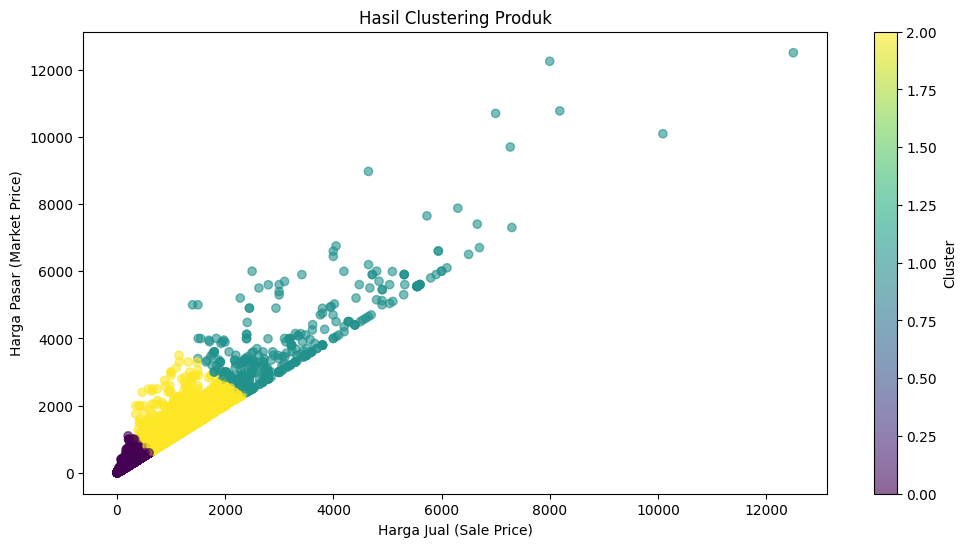

In [ ]:
plt.figure(figsize=(12, 6))
scatter = plt.scatter(df['sale_price'], df['market_price'],
                     c=df['cluster'], cmap='viridis',
                     alpha=0.6)
plt.xlabel('Harga Jual (Sale Price)')
plt.ylabel('Harga Pasar (Market Price)')
plt.title('Hasil Clustering Produk')
plt.colorbar(scatter, label='Cluster')

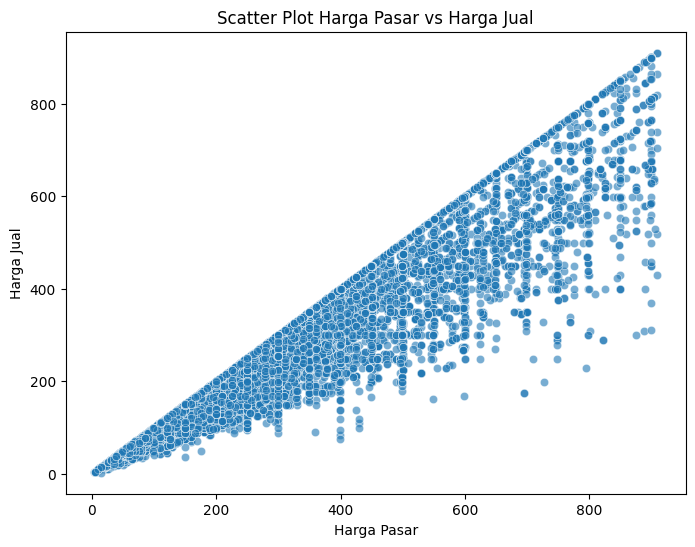

In [ ]:
# Scatter plot harga jual vs harga pasar
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data_clf, x='market_price', y='sale_price', alpha=0.6)
plt.title('Scatter Plot Harga Pasar vs Harga Jual')
plt.xlabel('Harga Pasar')
plt.ylabel('Harga Jual')
plt.show()

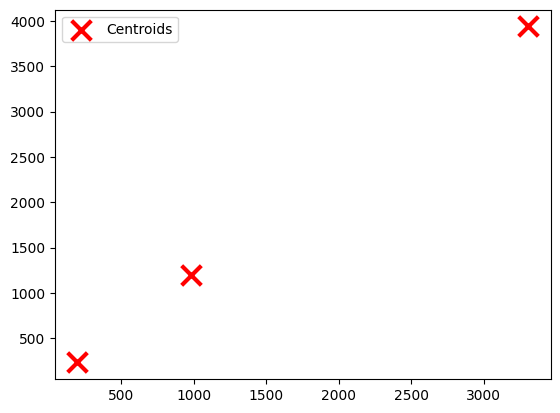

In [ ]:
centroids = final_kmeans.cluster_centers_
centroids_original = scaler.inverse_transform(centroids)
plt.scatter(centroids_original[:, 0], centroids_original[:, 1],
           c='red', marker='x', s=200, linewidths=3,
           label='Centroids')
plt.legend()
plt.show()

In [ ]:
print("\nKarakteristik Cluster:")
for i in range(optimal_k):
    cluster_data = df[df['cluster'] == i]
    print(f"\nCluster {i}:")
    print(f"Jumlah produk: {len(cluster_data)}")
    print(f"Rata-rata harga jual: {cluster_data['sale_price'].mean():.2f}")
    print(f"Rata-rata harga pasar: {cluster_data['market_price'].mean():.2f}")


Karakteristik Cluster:

Cluster 0:
Jumlah produk: 24327
Rata-rata harga jual: 199.47
Rata-rata harga pasar: 232.38

Cluster 1:
Jumlah produk: 368
Rata-rata harga jual: 3306.76
Rata-rata harga pasar: 3939.94

Cluster 2:
Jumlah produk: 2860
Rata-rata harga jual: 985.17
Rata-rata harga pasar: 1197.37


In [ ]:
# Simpan model menggunakan pickle
model_filename = 'kmeans_model.pkl'
# Simpan model K-Means
with open(model_filename, 'wb') as file:
    pickle.dump(final_kmeans, file)


### Regression Linear

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
X = df[['market_price']]  # variabel independen
y = df['sale_price']      # variabel dependen

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

In [ ]:
print("Hasil Analisis Regresi Linear:")
print(f"Intercept (b0): {model.intercept_:.2f}")
print(f"Coefficient (b1): {model.coef_[0]:.2f}")
print(f"R-squared (R²): {r2:.4f}")
print(f"Root Mean Square Error (RMSE): {rmse:.2f}")


Hasil Analisis Regresi Linear:
Intercept (b0): 14.04
Coefficient (b1): 0.81
R-squared (R²): 0.9255
Root Mean Square Error (RMSE): 130.05


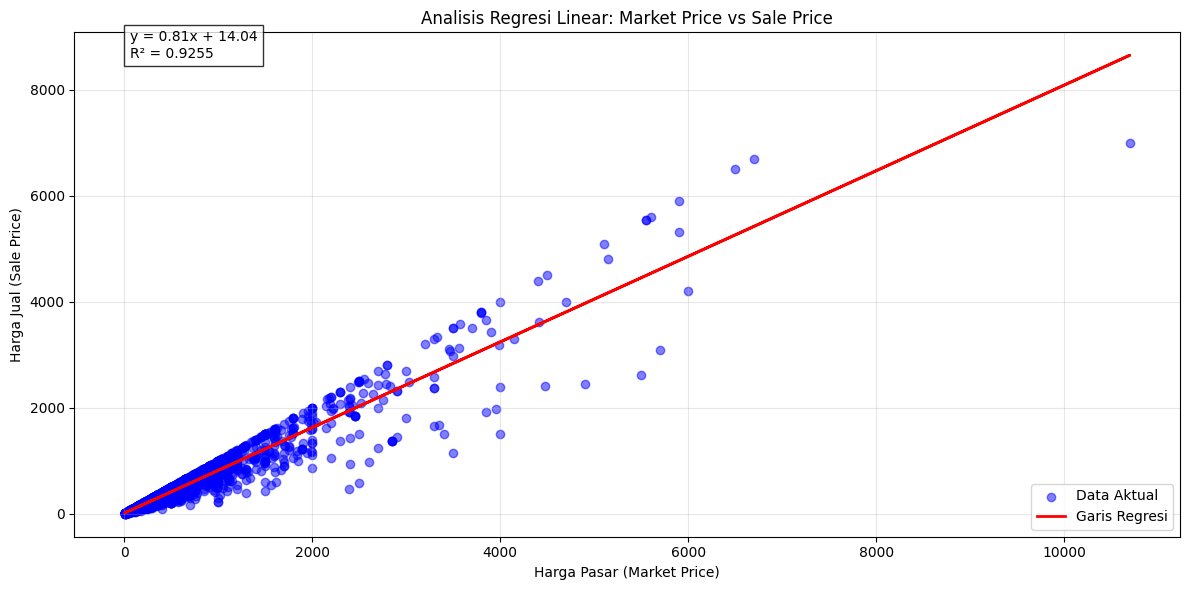

In [ ]:
# Visualisasi hasil
plt.figure(figsize=(12, 6))

# Plot data asli
plt.scatter(X_test, y_test, color='blue', alpha=0.5, label='Data Aktual')

# Plot garis regresi
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Garis Regresi')

plt.xlabel('Harga Pasar (Market Price)')
plt.ylabel('Harga Jual (Sale Price)')
plt.title('Analisis Regresi Linear: Market Price vs Sale Price')
plt.legend()
plt.grid(True, alpha=0.3)

# Tambahkan persamaan regresi dan R² pada plot
equation = f'y = {model.coef_[0]:.2f}x + {model.intercept_:.2f}'
r2_text = f'R² = {r2:.4f}'
plt.text(0.05, 0.95, equation + '\n' + r2_text,
         transform=plt.gca().transAxes,
         bbox=dict(facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()

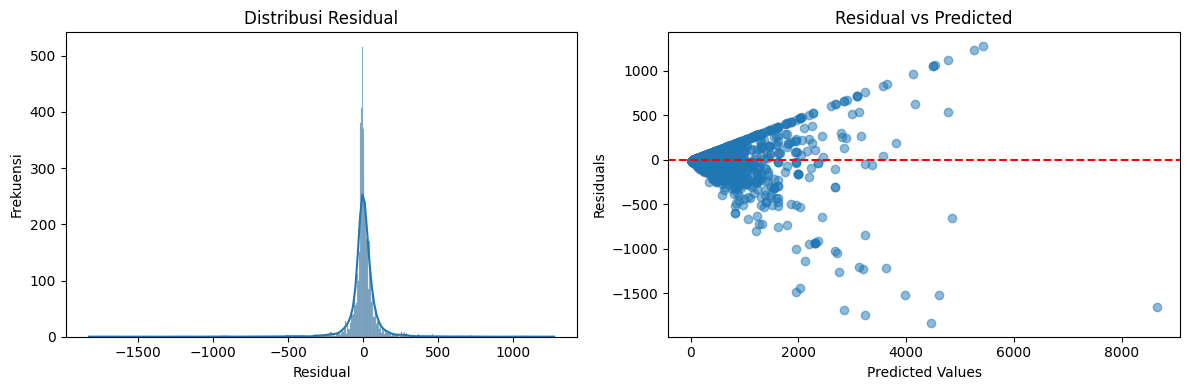

In [ ]:
# Analisis residual
residuals = y_test - y_pred

plt.figure(figsize=(12, 4))

# Plot distribusi residual
plt.subplot(1, 2, 1)
sns.histplot(residuals, kde=True)
plt.title('Distribusi Residual')
plt.xlabel('Residual')
plt.ylabel('Frekuensi')

# Plot residual vs predicted
plt.subplot(1, 2, 2)
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residual vs Predicted')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')

plt.tight_layout()
plt.show()

In [ ]:
# Contoh penggunaan model untuk prediksi
print("\nContoh Prediksi:")
sample_prices = np.array([[100], [500], [1000]])
predictions = model.predict(sample_prices)
for market_price, predicted_sale_price in zip(sample_prices, predictions):
    print(f"Market Price: {market_price[0]:.2f} -> Predicted Sale Price: {predicted_sale_price:.2f}")


Contoh Prediksi:
Market Price: 100.00 -> Predicted Sale Price: 94.79
Market Price: 500.00 -> Predicted Sale Price: 417.80
Market Price: 1000.00 -> Predicted Sale Price: 821.55


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
# Simpan model
import pickle
model_filename = 'linear_regression_model.pkl'
with open(model_filename, 'wb') as file:
    pickle.dump(model, file)

### Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Persiapkan data
X = df[['market_price']]  # variabel independen
# Pastikan sale_price selalu lebih tinggi dari market_price
y = df.apply(lambda row: max(row['sale_price'], row['market_price'] * 1.1), axis=1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Buat dan latih model Decision Tree
dt_model = DecisionTreeRegressor(
    max_depth=8,
    min_samples_split=5,
    min_samples_leaf=4,
    random_state=42
)
dt_model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=8, min_samples_leaf=4, min_samples_split=5,
                      random_state=42)

In [ ]:
# Custom prediction function untuk memastikan sale_price > market_price
def predict_sale_price(model, market_prices):
    predictions = model.predict(market_prices)
    # Tambahkan margin minimal 10% dari market_price
    market_prices_array = market_prices['market_price'].values
    adjusted_predictions = np.maximum(predictions, market_prices_array * 1.1)
    return adjusted_predictions

In [ ]:
# Lakukan prediksi dengan fungsi custom
y_pred = predict_sale_price(dt_model, X_test)

In [ ]:
# Evaluasi model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

In [ ]:
print("Hasil Analisis Decision Tree:")
print(f"R-squared (R²): {r2:.4f}")
print(f"Root Mean Square Error (RMSE): {rmse:.2f}")

Hasil Analisis Decision Tree:
R-squared (R²): 0.9999
Root Mean Square Error (RMSE): 6.18


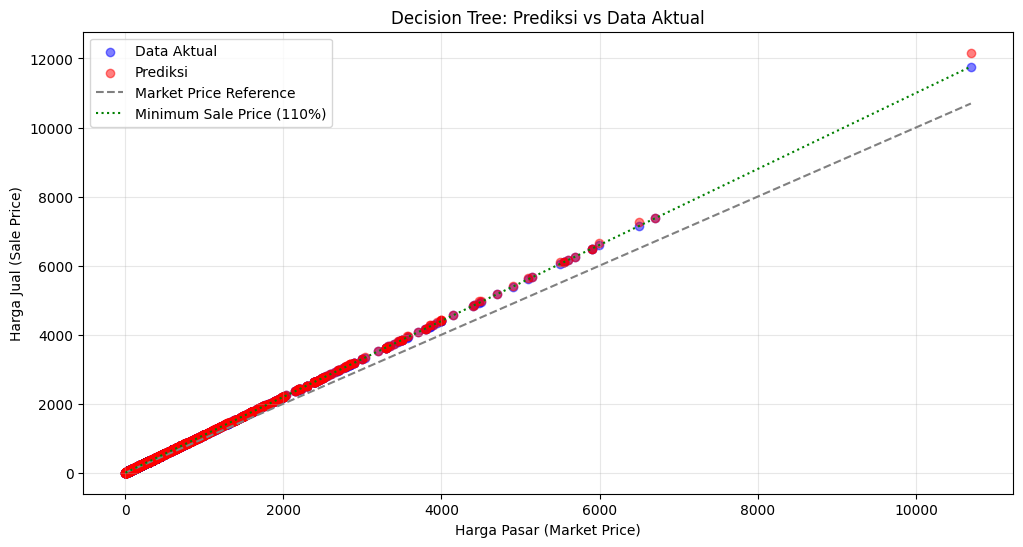

In [ ]:
# Visualisasi hasil prediksi
plt.figure(figsize=(12, 6))
plt.scatter(X_test, y_test, color='blue', alpha=0.5, label='Data Aktual')
plt.scatter(X_test, y_pred, color='red', alpha=0.5, label='Prediksi')

# Tambahkan garis referensi market_price
x_min, x_max = X_test['market_price'].min(), X_test['market_price'].max()
x_range = np.linspace(x_min, x_max, 100).reshape(-1, 1)
plt.plot([x_min, x_max], [x_min, x_max], '--', color='gray', label='Market Price Reference')
plt.plot([x_min, x_max], [x_min*1.1, x_max*1.1], ':', color='green', label='Minimum Sale Price (110%)')

plt.xlabel('Harga Pasar (Market Price)')
plt.ylabel('Harga Jual (Sale Price)')
plt.title('Decision Tree: Prediksi vs Data Aktual')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

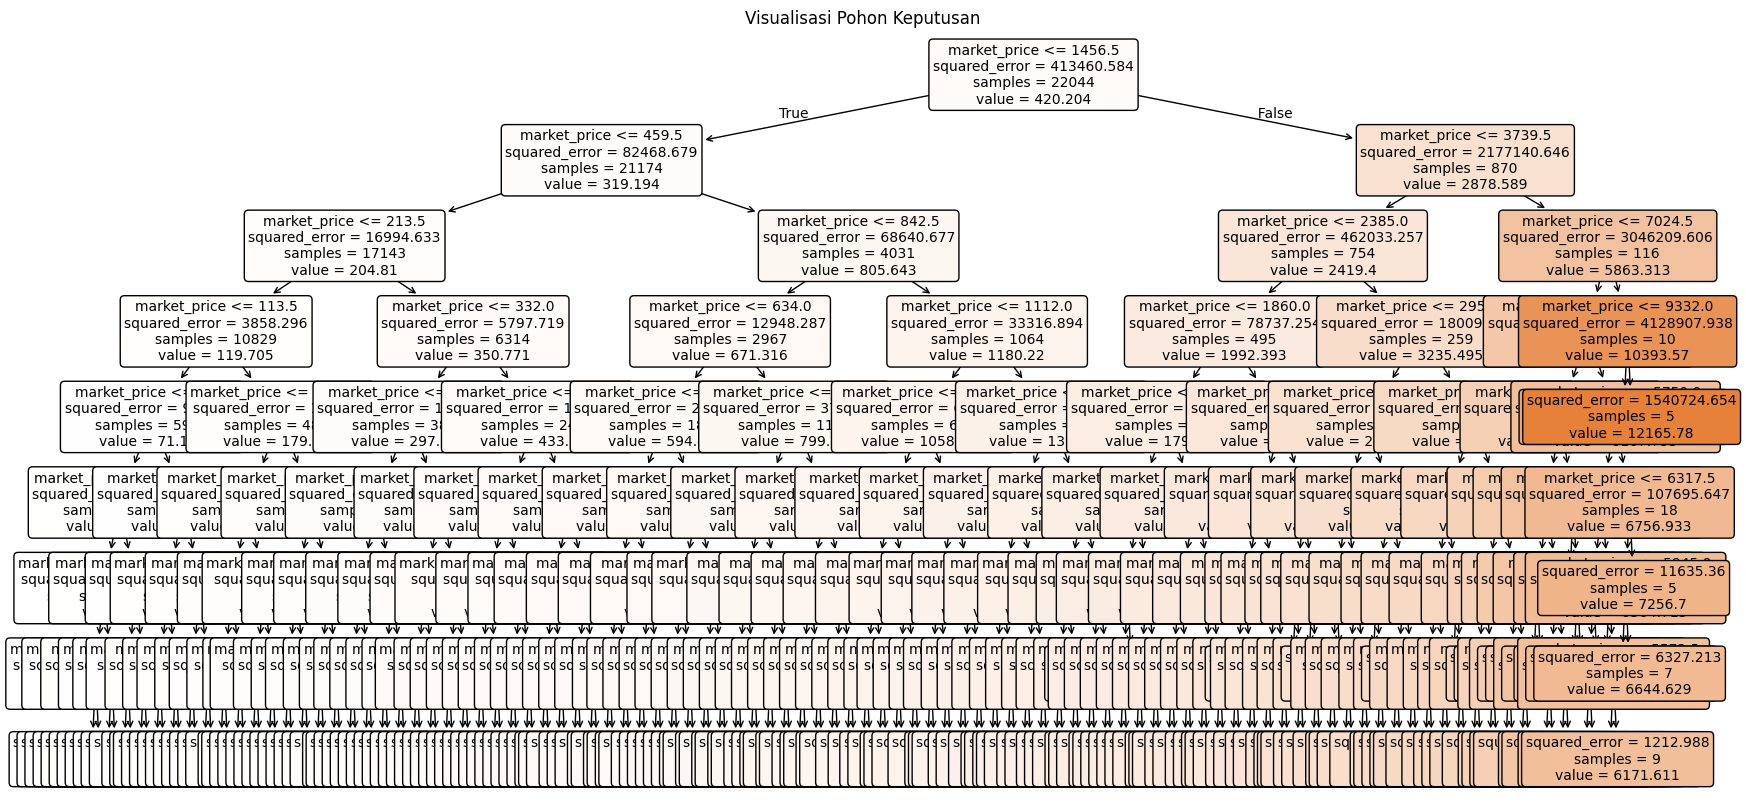

In [ ]:
# Visualisasi pohon keputusan
plt.figure(figsize=(20,10))
plot_tree(dt_model, feature_names=['market_price'],
          filled=True, rounded=True, fontsize=10)
plt.title('Visualisasi Pohon Keputusan')
plt.show()

In [ ]:
# Feature importance
importance = dt_model.feature_importances_
print("\nFeature Importance:")
for feature, imp in zip(['market_price'], importance):
    print(f"{feature}: {imp:.4f}")


Feature Importance:
market_price: 1.0000


In [ ]:
# Contoh penggunaan model untuk prediksi
print("\nContoh Prediksi:")
sample_prices = pd.DataFrame({'market_price': [100, 500, 1000]})
predictions = predict_sale_price(dt_model, sample_prices)
for market_price, predicted_sale_price in zip(sample_prices['market_price'], predictions):
    margin = ((predicted_sale_price - market_price) / market_price) * 100
    print(f"Market Price: {market_price:.2f} -> Predicted Sale Price: {predicted_sale_price:.2f} (Margin: {margin:.1f}%)")


Contoh Prediksi:
Market Price: 100.00 -> Predicted Sale Price: 110.00 (Margin: 10.0%)
Market Price: 500.00 -> Predicted Sale Price: 550.00 (Margin: 10.0%)
Market Price: 1000.00 -> Predicted Sale Price: 1100.00 (Margin: 10.0%)


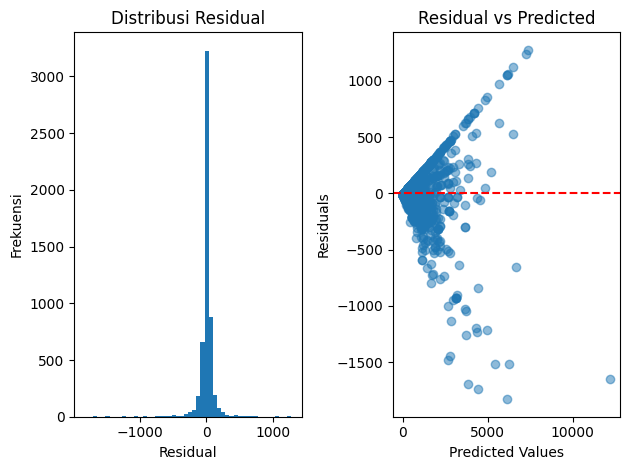

In [ ]:
# Plot distribusi residual
plt.subplot(1, 2, 1)
plt.hist(residuals, bins=50)
plt.title('Distribusi Residual')
plt.xlabel('Residual')
plt.ylabel('Frekuensi')

# Plot residual vs predicted
plt.subplot(1, 2, 2)
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residual vs Predicted')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')

plt.tight_layout()
plt.show()

In [ ]:
# Simpan model
import pickle
model_filename = 'decision_tree_model.pkl'
with open(model_filename, 'wb') as file:
    pickle.dump(dt_model, file)

In [ ]:
!pip install ngrok

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 34.3 MB/s eta 0:00:00


In [ ]:
!pip install streamlit pyngrok==7.1.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 64.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 89.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 5.6 MB/s eta 0:00:00


In [ ]:
!ngrok config add-authtoken 2xqUQgHan8wo6Fov54xRsBmoHmn_agF8fVCuiLKhVNNZ3FFq

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [ ]:
%%writefile app.py
import streamlit as st
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, r2_score, mean_squared_error
import os # Import os module

# Set page config
st.set_page_config(
    page_title="Analisis Model Prediksi Harga",
    page_icon="📊",
    layout="wide"
)

# Load data
@st.cache_data
def load_data():
    try:
        # Use 'retail.csv' as loaded earlier in the notebook
        df = pd.read_csv('retail.csv')
        # Perform basic cleaning/preparation done earlier in the notebook
        df['product'].fillna(df['product'].mode()[0], inplace=True)
        df['brand'].fillna(df['brand'].mode()[0], inplace=True)
        # Handle 'description' if it exists, although it wasn't in the final info()
        if 'description' in df.columns:
             df['description'].fillna(df['description'].mode()[0], inplace=True)
        if 'rating' in df.columns:
            df = df.drop(columns=['rating'])

        # Add 'profit' column as done in EDA
        df['profit'] = df['sale_price'] - df['market_price']
        # Add margin column
        df['margin'] = ((df['sale_price'] - df['market_price']) / df['market_price']) * 100

        return df
    except FileNotFoundError:
        st.error("Error: File 'retail.csv' not found.")
        return None
    except Exception as e:
        st.error(f"Error loading or preparing data: {e}")
        return None

# Function to load models from disk
@st.cache_resource # Use cache_resource for models
def load_models():
    models = {}
    # List model files you expect
    model_files = {
        'Linear Regression': 'linear_regression_model.pkl',
        'Decision Tree': 'decision_tree_model.pkl',
        'KMeans Clustering': 'kmeans_model.pkl'
    }

    for model_name, file_path in model_files.items():
        if os.path.exists(file_path):
            try:
                with open(file_path, 'rb') as f:
                    models[model_name] = pickle.load(f)
                #st.sidebar.success(f"{model_name} loaded successfully!") # Optional: show success in sidebar
            except Exception as e:
                st.sidebar.error(f"Error loading {model_name} from {file_path}: {e}")
        else:
            st.sidebar.warning(f"Model file not found: {file_path}")

    return models

# Custom prediction function untuk Decision Tree
def predict_sale_price(model, market_prices_df):
    # Ensure input is a DataFrame with 'market_price' column
    if not isinstance(market_prices_df, pd.DataFrame) or 'market_price' not in market_prices_df.columns:
        raise ValueError("Input to predict_sale_price must be a DataFrame with a 'market_price' column.")

    predictions = model.predict(market_prices_df)
    market_prices_array = market_prices_df['market_price'].values
    # Adjust predictions to ensure sale_price >= 1.1 * market_price
    # Apply adjustment only if model is DecisionTreeRegressor, as LR was not trained with this constraint
    if isinstance(model, DecisionTreeRegressor):
        adjusted_predictions = np.maximum(predictions, market_prices_array * 1.1)
        return adjusted_predictions
    else: # For Linear Regression, just return the prediction
        return predictions


def perform_clustering(df):
    if df is None:
        return None # Return None instead of df, None
    try:
        # Menggunakan StandardScaler untuk menstandarisasi data
        scaler = StandardScaler()
        scaled_data = scaler.fit_transform(df[['market_price', 'sale_price']])

        # Menggunakan KMeans untuk clustering (using optimal k=3 from notebook)
        kmeans = KMeans(n_clusters=3, random_state=42, n_init=10) # Added n_init
        df['cluster'] = kmeans.fit_predict(scaled_data)

        # Menghitung silhouette score
        silhouette_avg = silhouette_score(scaled_data, df['cluster'])
        return df, silhouette_avg # Return df and score

    except Exception as e:
        st.error(f"Error during clustering: {e}")
        return df, None # Return df and None for score


def main():
    st.title("Dashboard Analisis Model Prediksi Harga")

    # Load data
    df = load_data()
    if df is None:
        return # Stop if data loading failed

    # Load all available models
    models = load_models()

    # Perform clustering and add cluster column to df (only if KMeans model is loaded)
    kmeans_model = models.get('KMeans Clustering')
    silhouette_avg = None
    if kmeans_model:
         # Use the *loaded* KMeans model to assign clusters to the DataFrame
         try:
             scaler = StandardScaler()
             scaled_data = scaler.fit_transform(df[['market_price', 'sale_price']])
             df['cluster'] = kmeans_model.predict(scaled_data) # Use predict with loaded model
             silhouette_avg = silhouette_score(scaled_data, df['cluster'])
         except Exception as e:
             st.error(f"Error applying loaded KMeans model: {e}")
             df['cluster'] = None # Set cluster to None if error occurs
    else:
        st.warning("KMeans model not loaded. Clustering analysis might be limited.")
        df['cluster'] = None # Ensure cluster column exists, even if None

    # Sidebar for model selection
    st.sidebar.title("Pilih Model")
    model_options = list(models.keys())
    if not model_options:
        st.sidebar.warning("Tidak ada model yang berhasil dimuat.")
        selected_model_name = None
        model = None
    else:
        selected_model_name = st.sidebar.selectbox("Pilih Model yang akan Dianalisis:", model_options)
        model = models[selected_model_name]


    # Conditional display based on whether a model is selected
    if model is not None:
        st.sidebar.write(f"Model Terpilih: **{selected_model_name}**")

        # Tampilkan tabs untuk berbagai analisis
        tab1, tab2, tab3, tab4, tab5 = st.tabs(["Model Info", "Feature Analysis", "Prediksi Harga", "Visualisasi Model", "Analisis Data"])

        with tab1:
            st.header(f"Informasi Model: {selected_model_name}")

            if isinstance(model, DecisionTreeRegressor):
                st.write("Tipe Model: Decision Tree Regressor")
                col1, col2 = st.columns(2)
                with col1:
                    st.metric("Kedalaman Pohon", model.get_depth())
                with col2:
                    st.metric("Jumlah Leaf Nodes", model.get_n_leaves())

                # Feature importance - Check if the model was trained with features
                if hasattr(model, 'feature_importances_') and model.feature_importances_.size > 0:
                    st.subheader("Feature Importance")
                    # Assuming 'market_price' was the only feature used for these models
                    feature_names = ['market_price'] # Or get from model if available
                    importance = model.feature_importances_
                    importance_df = pd.DataFrame({
                        'Feature': feature_names,
                        'Importance': importance
                    })
                    st.dataframe(importance_df)
                else:
                    st.info("Feature importance not available for this model.")


            elif isinstance(model, LinearRegression):
                st.write("Tipe Model: Linear Regression")
                if hasattr(model, 'coef_') and hasattr(model, 'intercept_'):
                    st.write("Koefisien:", model.coef_[0])
                    st.write("Intercept:", model.intercept_)
                else:
                     st.info("Coefficients and Intercept not available for this model.")


            elif isinstance(model, KMeans):
                st.write("Tipe Model: KMeans Clustering")
                st.write("Jumlah Cluster:", model.n_clusters)
                if silhouette_avg is not None:
                    st.write("Silhouette Score:", silhouette_avg)
                else:
                     st.warning("Silhouette Score could not be calculated.")

            else:
                 st.warning("Informasi spesifik tidak tersedia untuk tipe model ini.")


        with tab2:
            st.header("Analisis Feature")

            # Scatter plot harga pasar vs harga jual
            st.subheader("Hubungan Harga Pasar vs Harga Jual")
            fig, ax = plt.subplots(figsize=(10, 6))
            sns.scatterplot(data=df, x='market_price', y='sale_price', alpha=0.5)
            plt.title("Scatter Plot Harga Pasar vs Harga Jual")
            plt.xlabel("Harga Pasar")
            plt.ylabel("Harga Jual")
            st.pyplot(fig)

            # Distribusi margin
            st.subheader("Analisis Margin")
            # Ensure 'margin' column exists from load_data
            if 'margin' in df.columns:
                 fig, ax = plt.subplots(figsize=(10, 6))
                 # Filter out infinite values that can result from market_price = 0
                 margin_data = df['margin'].replace([np.inf, -np.inf], np.nan).dropna()
                 sns.histplot(data=margin_data, bins=50)
                 plt.title("Distribusi Margin Harga")
                 plt.xlabel("Margin (%)")
                 plt.ylabel("Frekuensi")
                 st.pyplot(fig)

                 col1, col2 = st.columns(2)
                 with col1:
                     st.metric("Rata-rata Margin", f"{margin_data.mean():.2f}%")
                 with col2:
                     st.metric("Median Margin", f"{margin_data.median():.2f}%")
            else:
                 st.warning("Margin column not available in data.")


        with tab3:
            st.header("Prediksi Harga")

            if isinstance(model, (LinearRegression, DecisionTreeRegressor)):
                # Input untuk prediksi
                col1, col2 = st.columns(2)
                with col1:
                    input_price = st.number_input("Masukkan Harga Pasar:", min_value=0.01, value=100.0, format="%.2f") # Min value > 0 to avoid / 0

                if st.button("Prediksi"):
                    try:
                        # Pass input_price as a DataFrame for predict_sale_price
                        prediction = predict_sale_price(model, pd.DataFrame({'market_price': [input_price]}))[0]
                        margin = ((prediction - input_price) / input_price) * 100 if input_price != 0 else float('inf')

                        col1, col2 = st.columns(2)
                        with col1:
                            st.metric("Prediksi Harga Jual", f"${prediction:.2f}")
                        with col2:
                             st.metric("Margin Prediksi", f"{margin:.2f}%" if margin != float('inf') else "N/A")

                    except Exception as e:
                        st.error(f"Error saat melakukan prediksi: {e}")

                # Tampilkan contoh prediksi untuk beberapa harga
                st.subheader("Contoh Prediksi untuk Berbagai Harga")
                sample_prices = pd.DataFrame({'market_price': [100, 500, 1000, 2000, 5000]})
                # Use the custom prediction function for both models for consistency and margin logic
                predictions = predict_sale_price(model, sample_prices)


                results = []
                # Ensure predictions is an iterable (like a list or numpy array)
                if isinstance(predictions, np.ndarray):
                    predictions_list = predictions.flatten()
                else:
                    predictions_list = predictions # Assume it's already list-like


                for market_price, pred in zip(sample_prices['market_price'], predictions_list):
                    # Calculate margin only if market_price is not zero to avoid division by zero
                    margin = ((pred - market_price) / market_price) * 100 if market_price != 0 else float('inf')
                    results.append({
                        'Harga Pasar': f"${market_price:.2f}",
                        'Prediksi Harga Jual': f"${pred:.2f}",
                        'Margin': f"{margin:.1f}%" if margin != float('inf') else "N/A"
                    })
                st.table(pd.DataFrame(results))
            else:
                st.info("Model yang dipilih bukan tipe regresi (Linear Regression atau Decision Tree) sehingga prediksi harga tidak didukung.")


        with tab4:
            st.header("Visualisasi Model")

            # st.write(f"Tipe model yang dimuat: {type(model)}") # Optional debug log

            if isinstance(model, DecisionTreeRegressor):
                st.subheader("Visualisasi Pohon Keputusan")
                # Decision Tree plot can be large, handle figure creation
                fig, ax = plt.subplots(figsize=(20, 10))
                plot_tree(model, feature_names=['market_price'], # Assuming 'market_price' is the feature name
                         filled=True, rounded=True, fontsize=10)
                plt.title('Visualisasi Pohon Keputusan')
                st.pyplot(fig)
                plt.close(fig) # Close figure to free memory


                # Plot prediksi vs aktual
                st.subheader("Prediksi vs Aktual (Decision Tree)")
                X_data = df[['market_price']] # Use the market_price column from the data
                y_pred = model.predict(X_data) # Predict using the loaded model

                fig, ax = plt.subplots(figsize=(10, 6))
                plt.scatter(df['market_price'], df['sale_price'], alpha=0.5, label='Aktual')
                plt.scatter(df['market_price'], y_pred, alpha=0.5, label='Prediksi')
                plt.legend()
                plt.title('Perbandingan Harga Aktual vs Prediksi (Decision Tree)')
                plt.xlabel('Harga Pasar')
                plt.ylabel('Harga Jual')
                 # Calculate R²
                try:
                    # Need to calculate R2 against the *original* sale price from df
                    r2 = r2_score(df['sale_price'], y_pred)
                    st.write(f"R² Score (vs actual sale_price): {r2:.4f}")
                except Exception as e:
                    st.warning(f"Could not calculate R²: {e}")

                st.pyplot(fig)
                plt.close(fig) # Close figure


            elif isinstance(model, KMeans):
                st.subheader("Visualisasi Hasil Clustering KMeans")

                # Check if cluster column exists and clustering was successful
                if 'cluster' in df.columns and df['cluster'] is not None:
                    # Plot hasil clustering
                    fig, ax = plt.subplots(figsize=(10, 6))
                    sns.scatterplot(data=df, x='market_price', y='sale_price', hue='cluster', palette='viridis', alpha=0.5, ax=ax) # Pass ax
                    # Optionally plot centroids if available
                    # Centroids would need to be loaded or recalculated based on clustered data
                    if hasattr(model, 'cluster_centers_'):
                        scaler = StandardScaler() # Need scaler to inverse transform centroids
                        # Refit scaler on the data used for clustering in the notebook
                        # This is tricky - ideally save the scaler too or refit carefully
                        # For simplicity, let's assume we can refit on df for visualization purposes
                        try:
                           X_clustering_viz = df[['market_price', 'sale_price']]
                           scaler_viz = StandardScaler()
                           scaler_viz.fit(X_clustering_viz) # Fit on the data
                           centroids_original = scaler_viz.inverse_transform(model.cluster_centers_)
                           plt.scatter(centroids_original[:, 0], centroids_original[:, 1],
                                       c='red', marker='X', s=200, linewidths=3, label='Centroids')
                        except Exception as e:
                           st.warning(f"Could not visualize centroids: {e}")


                    plt.title('Hasil Clustering KMeans')
                    plt.xlabel('Harga Pasar')
                    plt.ylabel('Harga Jual')
                    plt.legend()
                    st.pyplot(fig)
                    plt.close(fig) # Close figure

                else:
                    st.warning("Clustering results not available in the DataFrame.")


                # Visualisasi Elbow Method (Still requires re-running KMeans for the plot)
                st.subheader("Visualisasi Elbow Method")
                inertias = []
                silhouette_scores_plot = []
                k_range = range(2, 11)

                # Re-run K-Means for the plot data (using df, not scaled_data for plotting consistency)
                # This part is less efficient as it re-runs the model, but necessary for the plot
                try:
                    X_plot_clustering = df[['market_price', 'sale_price']].dropna() # Handle potential NaNs
                    if not X_plot_clustering.empty:
                        scaler_plot = StandardScaler()
                        X_scaled_plot = scaler_plot.fit_transform(X_plot_clustering)

                        for k in k_range:
                            kmeans_plot = KMeans(n_clusters=k, random_state=42, n_init=10) # Added n_init
                            kmeans_plot.fit(X_scaled_plot)
                            inertias.append(kmeans_plot.inertia_)
                            # Check if silhouette_score is valid (requires >= 2 clusters and > 1 sample)
                            if X_scaled_plot.shape[0] > 1 and k >= 2:
                                score = silhouette_score(X_scaled_plot, kmeans_plot.labels_)
                                silhouette_scores_plot.append(score)
                            else:
                                silhouette_scores_plot.append(0) # Append 0 or NaN if not valid

                        # Plot Elbow Method
                        fig, ax = plt.subplots(figsize=(10, 6))
                        plt.plot(k_range, inertias, 'bx-')
                        plt.xlabel('Jumlah Cluster (k)')
                        plt.ylabel('Inertia')
                        plt.title('Elbow Method untuk Optimal k')
                        st.pyplot(fig)
                        plt.close(fig) # Close figure

                        # Plot Silhouette Score
                        st.subheader("Visualisasi Silhouette Score")
                        fig, ax = plt.subplots(figsize=(10, 6))
                        # Plot only for k >= 2 where score is valid
                        plt.plot(k_range[1:], silhouette_scores_plot[1:], 'rx-')
                        plt.xlabel('Jumlah Cluster (k)')
                        plt.ylabel('Silhouette Score')
                        plt.title('Silhouette Score untuk Optimal k')
                        st.pyplot(fig)
                        plt.close(fig) # Close figure

                    else:
                         st.warning("Not enough data for Elbow/Silhouette plots.")

                except Exception as e:
                    st.error(f"Error generating Elbow/Silhouette plots: {e}")


            elif isinstance(model, LinearRegression):
                st.subheader("Model Linear Regression")
                if hasattr(model, 'coef_') and hasattr(model, 'intercept_'):
                     st.write(f"Persamaan Regresi: Sale Price = {model.coef_[0]:.2f} * Market Price + {model.intercept_:.2f}")

                # Plot prediksi vs aktual untuk Linear Regression
                st.subheader("Prediksi vs Aktual (Linear Regression)")
                X_data = df[['market_price']] # Use the market_price column from the data
                y_pred = model.predict(X_data) # Predict using the loaded model

                fig, ax = plt.subplots(figsize=(10, 6))
                plt.scatter(df['market_price'], df['sale_price'], alpha=0.5, label='Aktual')
                plt.scatter(df['market_price'], y_pred, alpha=0.5, label='Prediksi', color='orange')
                plt.plot(df['market_price'], y_pred, color='red', label='Garis Regresi')  # Garis regresi
                plt.legend()
                plt.title('Perbandingan Harga Aktual vs Prediksi (Linear Regression)')
                plt.xlabel('Harga Pasar')
                plt.ylabel('Harga Jual')

                # Calculate R² and RMSE
                try:
                    r2 = r2_score(df['sale_price'], y_pred)
                    mse = mean_squared_error(df['sale_price'], y_pred)
                    rmse = np.sqrt(mse)
                    st.write(f"R² Score (vs actual sale_price): {r2:.4f}")
                    st.write(f"RMSE (vs actual sale_price): {rmse:.2f}")

                     # Add equation and R² to plot
                    equation = f'y = {model.coef_[0]:.2f}x + {model.intercept_:.2f}'
                    r2_text = f'R² = {r2:.4f}'
                    # Use fig.transfrom_axes or ax.transAxes
                    plt.text(0.05, 0.95, equation + '\n' + r2_text,
                            transform=ax.transAxes, # Use ax.transAxes
                            bbox=dict(facecolor='white', alpha=0.8))

                except Exception as e:
                    st.warning(f"Could not calculate R² or RMSE: {e}")


                st.pyplot(fig)
                plt.close(fig) # Close figure


            else:
                st.warning("Model yang dipilih tidak didukung untuk visualisasi model spesifik (Linear Regression, Decision Tree, atau KMeans).")

        with tab5:
            st.header("Analisis Data")
            st.markdown("""
            **Business Understanding**
            Sebuah toko online dengan produk kebutuhan rumah yang terdapat beberapa barang, dari data tersebut kami ingin menganalisis data produk untuk memahami performa produk.
            """)
            st.markdown("""
           | Nama Kolom (Column Name) | Deskripsi (Description)                                                                 |
|--------------------------|-----------------------------------------------------------------------------------------|
| index                    | Nomor urut unik yang mengidentifikasi setiap entri produk.                               |
| product                  | Nama atau judul yang digunakan untuk menampilkan produk.                                  |
| category                 | Klasifikasi utama di mana produk tersebut terdaftar.                                      |
| sub_category             | Pengelompokan lebih spesifik di dalam kategori utama produk.                             |
| brand                    | Nama produsen atau merek dagang yang terkait dengan produk.                               |
| sales_price              | Nilai moneter aktual produk saat ditawarkan untuk dijual pada platform.                   |
| market_price             | Estimasi nilai produk di pasaran umum.                                                   |
| type                     | Varian atau klasifikasi spesifik dari produk.                                            |
| rating                   | Skor evaluasi atau umpan balik kuantitatif dari konsumen mengenai kualitas produk.          |
            """)
            st.subheader("Statistical Summary (Numerical)")
            # Ensure df is not None before accessing describe
            if df is not None:
                st.dataframe(df.select_dtypes(include=np.number).describe()) # Display numerical stats
            else:
                 st.info("Data not loaded, cannot show statistical summary.")


            st.subheader("Missing Values")
            # Ensure df is not None from load_data
            if df is not None:
                missing_info = df.isnull().sum().reset_index()
                missing_info.columns = ['Column', 'Missing Count']
                missing_info['Missing Percentage (%)'] = (missing_info['Missing Count'] / len(df)) * 100
                st.dataframe(missing_info)
            else:
                st.info("Data not loaded, cannot show missing value info.")

            st.subheader("Value Counts (Categorical)")
            # Ensure df is not None
            if df is not None:
                 categorical_cols = df.select_dtypes(include='object').columns
                 if not categorical_cols.empty:
                     for col in categorical_cols:
                         st.write(f"**{col}**")
                         st.dataframe(df[col].value_counts().head(10)) # Show top 10
                 else:
                     st.info("No categorical columns found.")
            else:
                 st.info("Data not loaded, cannot show value counts.")


    else:
        st.info("Tidak ada model yang berhasil dimuat. Pastikan file .pkl model tersedia di direktori yang sama.")

if __name__ == "__main__":
    main()

Overwriting app.py


In [ ]:
from pyngrok import ngrok
import threading
import time
import os

In [ ]:

def run_streamlit():
    os.system("streamlit run app.py --server.port 8501")


thread = threading.Thread(target=run_streamlit, daemon=True)
thread.start()

time.sleep(5)

public_url = ngrok.connect(addr=8501)
print(f"Streamlit app is live at: {public_url}")

Streamlit app is live at: NgrokTunnel: "https://644e-34-90-124-36.ngrok-free.app" -> "http://localhost:8501"
